### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [55]:
#Import Library
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

1. display 5 columns from dataset

In [9]:
#1
url = "https://raw.githubusercontent.com/juancarlosvw/DATAMINING/refs/heads/main/MBA.csv"
dataset = pd.read_csv(url,sep=',')
dataset.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [10]:
#2

#conclusion
dataset.info()
#tipe data nya ada float,int,object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [20]:
admission_counts = dataset['admission'].value_counts(dropna=False)
admission_counts 

NaN         5194
Admit        900
Waitlist     100
Name: admission, dtype: int64

In [21]:
#3b
race_counts = dataset['race'].value_counts(dropna=False)
race_counts

NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64

4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [22]:
#4
dataset['admission'].fillna('deny', inplace=True)
dataset['race'].fillna('Other', inplace=True)

dataset.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,deny
2,3,Female,True,3.30,Business,Other,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,deny


5. recheck missing value

In [23]:
#5
missing_values = dataset.isnull().sum()

missing_values

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

6. drop application_id column

In [24]:
# 6
dataset = dataset.drop(columns=['application_id'])

7. show describe column and conclude what the insight is from that column

In [ ]:
#7
description = dataset[['gpa', 'gmat', 'work_exp']].describe()

description
#conclusion
#average gpa 3.25,average gmat 651.09,average work_exp 5.01

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

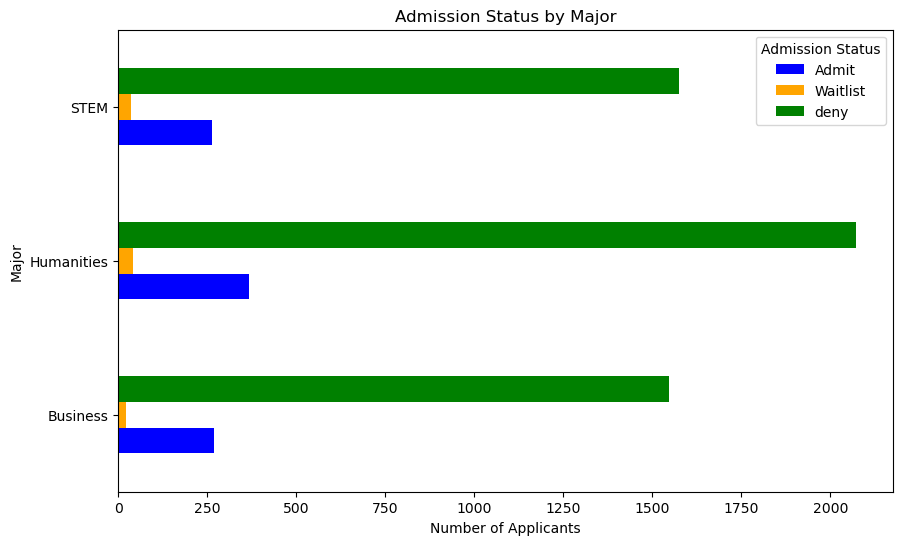

In [33]:
#8



# Group data by major and admission status, then count occurrences
admission_major = dataset.groupby(['major', 'admission']).size().unstack()

# Create a horizontal bar chart
admission_major.plot(kind='barh', stacked=False, color=['blue', 'orange', 'green'], figsize=(10, 6))

# Customize the chart
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')

# Show the chart
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

<Figure size 1200x600 with 0 Axes>

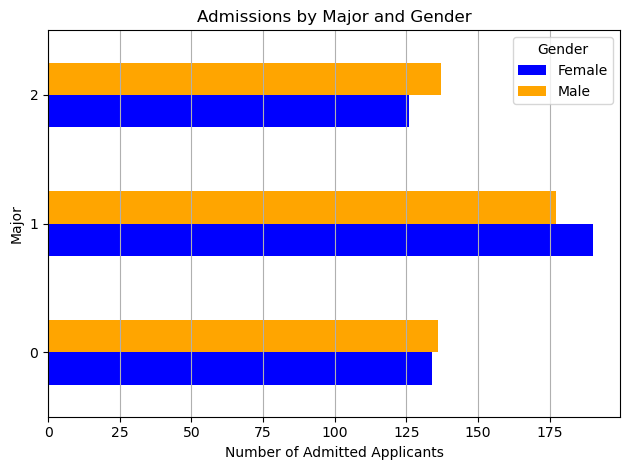

In [54]:
#9 Filter the DataFrame to include only admitted applicants (using the numeric code)
admitted_data = dataset[dataset['admission'] == 0]  # Assuming 'Admit' is encoded as 0

# Group data by major and gender, then count occurrences
gender_counts = admitted_data.groupby(['major', 'gender']).size().unstack(fill_value=0)

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
gender_counts.plot(kind='barh', stacked=False, color=['blue', 'orange'])

# Customize the chart
plt.title('Admissions by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender', labels=['Female', 'Male'])  # Adjust labels as needed
plt.grid(axis='x')

# Show the chart
plt.tight_layout()
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

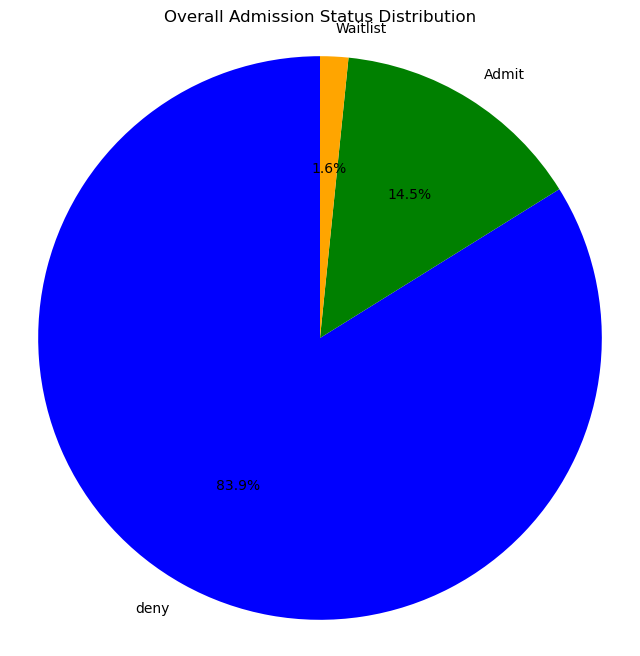

In [36]:
#10
# Group data by admission status and count occurrences
admission_counts = dataset['admission'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(admission_counts, labels=admission_counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'orange'], startangle=90)
plt.title('Overall Admission Status Distribution')
plt.axis('equal')  

# Show the chart
plt.show()

# Conclusion
#summarizes the overall admission status distribution, 
#showing the relative proportions of applicants who were admitted, waitlisted, and denied across the entire dataset.

11. create your own insightful visualization and explain it in at least 2 sentences

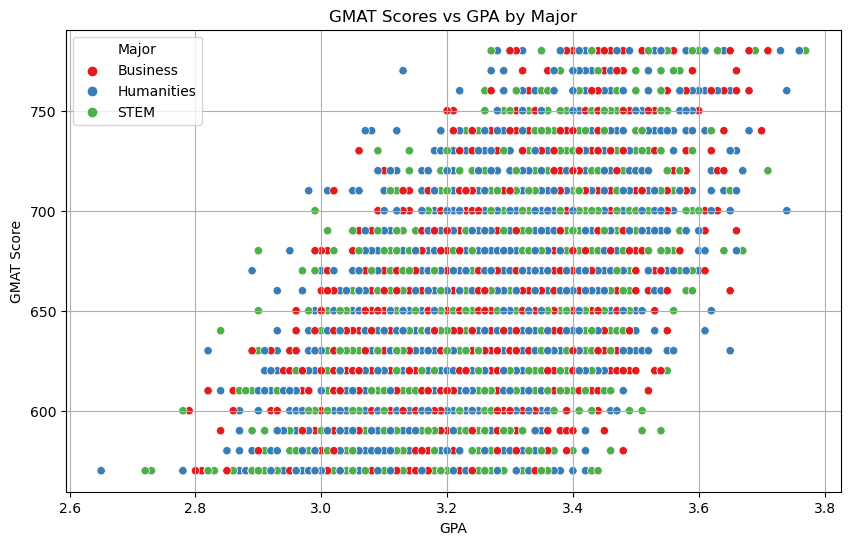

In [43]:
#11
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot using seaborn to distinguish by major
sns.scatterplot(x='gpa', y='gmat', hue='major', data=dataset, palette='Set1')

# Customize the plot
plt.title('GMAT Scores vs GPA by Major')
plt.xlabel('GPA')
plt.ylabel('GMAT Score')
plt.legend(title='Major')
plt.grid(True)

# Show the plot
plt.show()

#This bar chart will display the average GMAT scores for different majors.
#helping understand how GMAT performance varies by field of study.

12. encode categorical columns and display the results

In [48]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of categorical columns to encode (excluding 'admission')
categorical_columns = ['gender', 'major', 'international', 'work_industry','race']

# Encode each categorical column
for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Display the updated dataset
dataset.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [ ]:
#12

# Encode categorical columns (except the admission column)


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [52]:
# Assuming 'dataset' is already loaded and contains the relevant columns

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of categorical columns to encode (including 'admission')
categorical_columns = ['gender', 'major', 'international', 'work_industry', 'admission']

# Encode each categorical column
for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Display the updated dataset
dataset.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


In [ ]:
# Encode the admission column


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1


13. create a heatmap to see the correlation and explain the conclusion

C:\Users\M.S.I\AppData\Local\Temp\ipykernel_21492\1806026311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
C:\Users\M.S.I\AppData\Local\Temp\ipykernel_21492\1806026311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
C:\Users\M.S.I\AppData\Local\Temp\ipykernel_21492\1806026311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

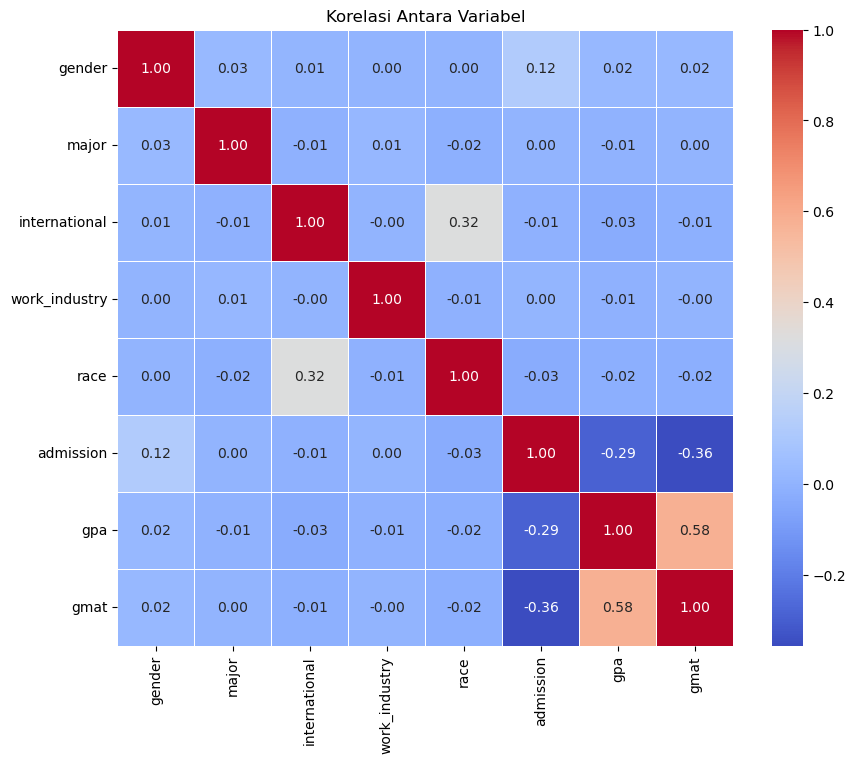

In [59]:
# Step 1: Select the columns you want to analyze
selected_columns = dataset[['gender', 'major', 'international', 'work_industry', 'race', 'admission', 'gpa', 'gmat']]  # Add more columns if needed

# Step 2: Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'major', 'international', 'work_industry', 'race', 'admission']

for column in categorical_columns:
    selected_columns[column] = label_encoder.fit_transform(selected_columns[column])

# Step 3: Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Step 4: Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=0.5)
plt.title('Korelasi Antara Variabel')
plt.show()

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [57]:
# prompt: make a model classification

# Separate features and target variable

# Split the data into training and testing sets

# Create a Decision Tree Classifier

# Train the model

# Make predictions on the test set

# Evaluate the model

# Step 1: Separate features and target variable
X = dataset.drop(columns=['admission'])  # Features (all columns except 'admission')
y = dataset['admission']  # Target variable (admission column)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Step 4: Train the model
clf.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Step 7: Make a prediction for Lisa
# Calculate the average GPA of all applicants
avg_gpa = dataset['gpa'].mean()

# Lisa's input data
lisa_data = pd.DataFrame({
    'gender': [1],  # Assuming '1' is the code for female
    'international': [0],  # Local student
    'gpa': [avg_gpa],  # Average GPA
    'major': [2],  # Assuming '2' corresponds to 'entrepreneurship'
    'work_industry': [1],  # Assuming '1' corresponds to 'finance'
    'gmat': [580],  # Lisa's GMAT score
    'work_exp': [2],  # Number of years Lisa worked (2018-2020)
    'race': [1]  # Assuming '1' corresponds to 'Asian'
}, columns=X.columns)  # Ensure the order of columns matches X

# Predict whether Lisa will be accepted
lisa_prediction = clf.predict(lisa_data)
print(f'Lisa will be: {"Admitted" if lisa_prediction[0] == 0 else "Denied"}')

Accuracy: 0.7877320419693301
Lisa will be: Denied


In [61]:
# Get the average GPA

# Create Lisa's data as a dictionary

# Create a DataFrame with Lisa's data

# Encode categorical features for Lisa's data

# Make a prediction using the trained model

# Decode the prediction back to the original label



# Assuming 'dataset' is already loaded and contains the relevant columns

# Step 1: Separate features and target variable
X = dataset.drop(columns=['admission'])  # Features (all columns except 'admission')
y = dataset['admission']  # Target variable (admission column)

# Step 2: Encode categorical columns (if not already encoded)
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'major', 'international', 'work_industry', 'race', 'admission']

for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Get the average GPA
avg_gpa = dataset['gpa'].mean()

# Step 6: Create Lisa's data as a dictionary
lisa_data_dict = {
    'gender': 1,  # Assuming '1' is the code for female
    'international': 0,  # Local student
    'gpa': avg_gpa,  # Average GPA
    'major': 2,  # Assuming '2' corresponds to 'entrepreneurship'
    'work_industry': 1,  # Assuming '1' corresponds to 'finance'
    'gmat': 580,  # Lisa's GMAT score
    'work_exp': 2,  # Number of years Lisa worked (2018-2020)
    'race': 1  # Assuming '1' corresponds to 'Asian'
}

# Step 7: Create a DataFrame with Lisa's data, ensuring the order of columns matches X
lisa_data = pd.DataFrame([lisa_data_dict], columns=X.columns)

# Step 8: Make a prediction using the trained model
lisa_prediction = clf.predict(lisa_data)

# Step 9: Decode the prediction back to the original label
predicted_admission_label = label_encoder.inverse_transform(lisa_prediction)

# Step 10: Output the result
print(f'Prediction for Lisa\'s admission: {predicted_admission_label[0]}')


Prediction for Lisa's admission: 2
